In [1]:
import glob
import os
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, models, transforms

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/MyDrive/python_lab")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/python_lab'

In [3]:
lr = 0.001
batch_size = 10
epochs = 10

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)

print(device)

cuda


In [5]:
df = pd.read_csv('annotation_random.csv', delimiter='\t', usecols=(1, 2), names=('Path', 'Name'))

Class dataset,which will store uploaded and converted images and class labels: 0-cat, 1-dog

In [6]:

class dataset(torch.utils.data.Dataset):
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform


    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list["Path"])
        return self.filelength

    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list.iloc[idx]["Path"].replace("\\", "/")
        img = Image.open(img_path)
        img_transformed = self.transform(img)

        label = self.file_list.iloc[idx]["Name"]
        if label == 'dog':
            label=1
        elif label == 'cat':
            label=0

        return img_transformed,label

In [7]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    ])

In [8]:
train_data = dataset(df.iloc[0:1600], transform=train_transforms)
test_data = dataset(df.iloc[1600:1800], transform=test_transforms)
val_data = dataset(df.iloc[1800:2000], transform=val_transforms)

Convolutional neural network

In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )

        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )


        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()


    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Model training

Learning rate: 0.01, Batch size: 10
Epoch : 1, train accuracy : 0.4706251621246338, train loss : 0.7040994167327881
Epoch : 1, val_accuracy : 0.49500003457069397, val_loss : 0.69359290599823
Epoch : 2, train accuracy : 0.4893752336502075, train loss : 0.6941535472869873
Epoch : 2, val_accuracy : 0.5050000548362732, val_loss : 0.6934168934822083
Epoch : 3, train accuracy : 0.4768751263618469, train loss : 0.6942641139030457
Epoch : 3, val_accuracy : 0.5049999952316284, val_loss : 0.6930989027023315
Epoch : 4, train accuracy : 0.5093753933906555, train loss : 0.6935654878616333
Epoch : 4, val_accuracy : 0.49500006437301636, val_loss : 0.693801760673523
Epoch : 5, train accuracy : 0.4918750524520874, train loss : 0.6940426826477051
Epoch : 5, val_accuracy : 0.49500003457069397, val_loss : 0.6938948035240173
Epoch : 6, train accuracy : 0.49562525749206543, train loss : 0.694487988948822
Epoch : 6, val_accuracy : 0.5049999952316284, val_loss : 0.6938797235488892
Epoch : 7, train accuracy : 

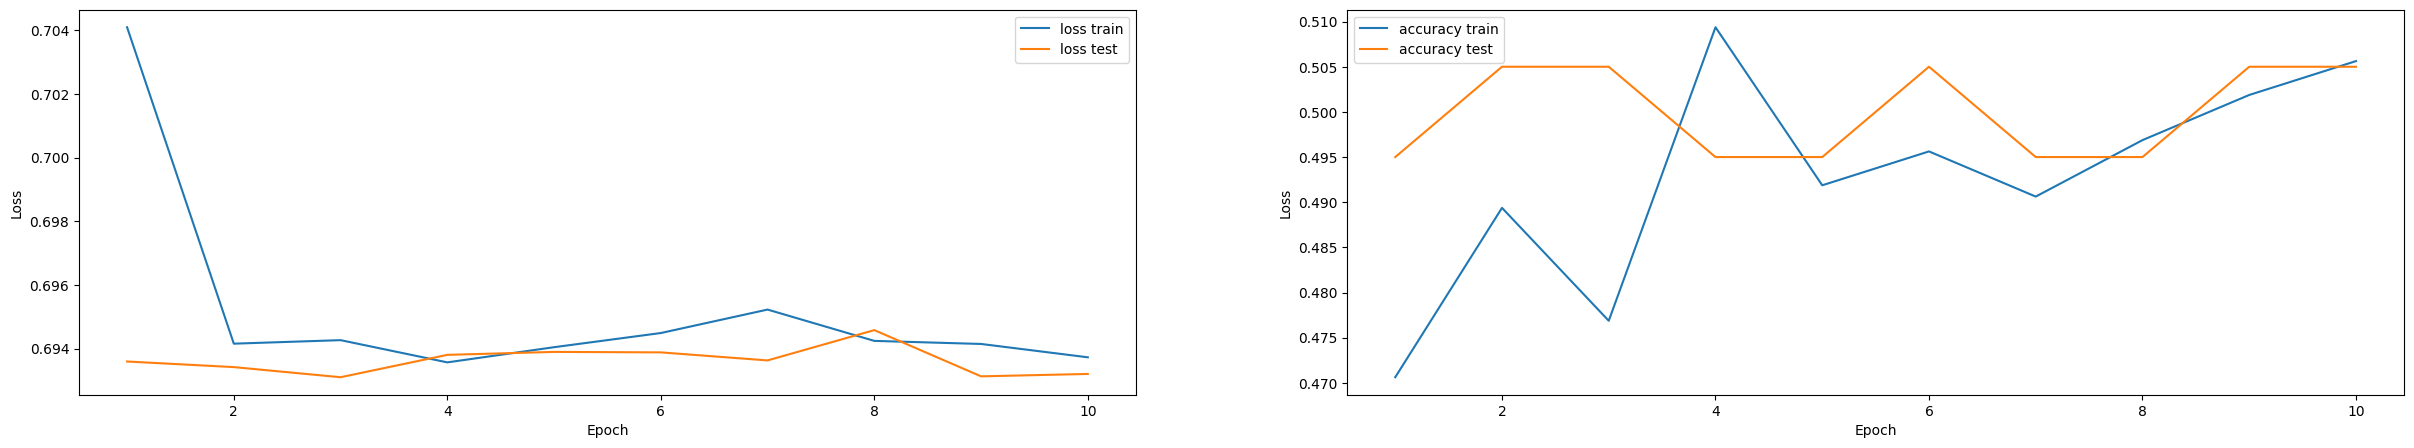



Learning rate: 0.001, Batch size: 10
Epoch : 1, train accuracy : 0.5718751549720764, train loss : 0.6835168600082397
Epoch : 1, val_accuracy : 0.5750000476837158, val_loss : 0.6830103993415833
Epoch : 2, train accuracy : 0.6250000596046448, train loss : 0.6484485268592834
Epoch : 2, val_accuracy : 0.6399999856948853, val_loss : 0.6188939213752747
Epoch : 3, train accuracy : 0.660000205039978, train loss : 0.6236003637313843
Epoch : 3, val_accuracy : 0.6800001263618469, val_loss : 0.5976398587226868
Epoch : 4, train accuracy : 0.676875114440918, train loss : 0.6018836498260498
Epoch : 4, val_accuracy : 0.6600000262260437, val_loss : 0.6150091886520386
Epoch : 5, train accuracy : 0.6512501835823059, train loss : 0.6137300729751587
Epoch : 5, val_accuracy : 0.6399999856948853, val_loss : 0.6209827065467834
Epoch : 6, train accuracy : 0.6987502574920654, train loss : 0.5799347758293152
Epoch : 6, val_accuracy : 0.7100000977516174, val_loss : 0.5871652960777283
Epoch : 7, train accuracy :

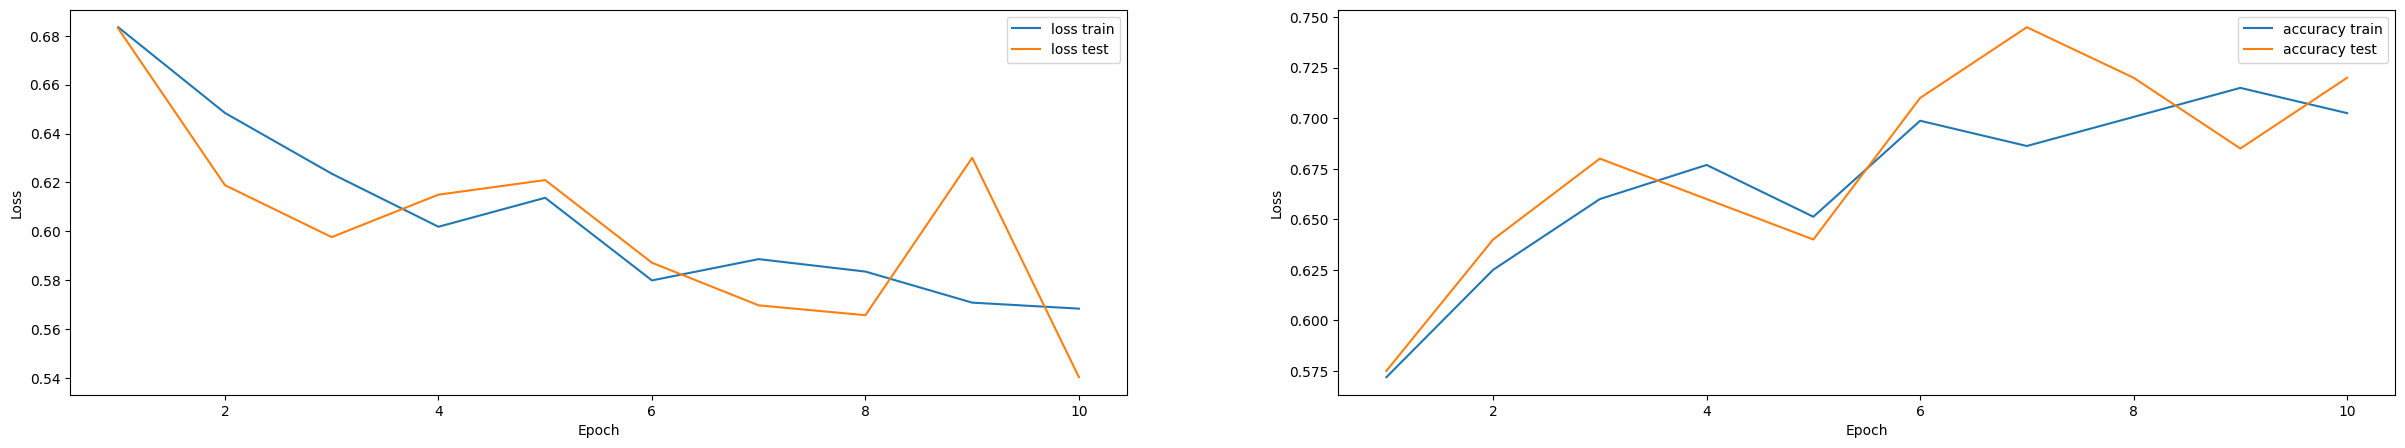



Learning rate: 0.0001, Batch size: 10
Epoch : 1, train accuracy : 0.5500003099441528, train loss : 0.686874270439148
Epoch : 1, val_accuracy : 0.5949999094009399, val_loss : 0.6659926176071167
Epoch : 2, train accuracy : 0.6306249499320984, train loss : 0.6510963439941406
Epoch : 2, val_accuracy : 0.5600000619888306, val_loss : 0.6813752055168152
Epoch : 3, train accuracy : 0.6412501335144043, train loss : 0.6329118609428406
Epoch : 3, val_accuracy : 0.5949999690055847, val_loss : 0.6361751556396484
Epoch : 4, train accuracy : 0.6412503123283386, train loss : 0.6238293051719666
Epoch : 4, val_accuracy : 0.6349999308586121, val_loss : 0.6205712556838989
Epoch : 5, train accuracy : 0.6531252264976501, train loss : 0.614039957523346
Epoch : 5, val_accuracy : 0.6600000858306885, val_loss : 0.5981557369232178
Epoch : 6, train accuracy : 0.676250159740448, train loss : 0.605437159538269
Epoch : 6, val_accuracy : 0.6950001120567322, val_loss : 0.5776289701461792
Epoch : 7, train accuracy : 

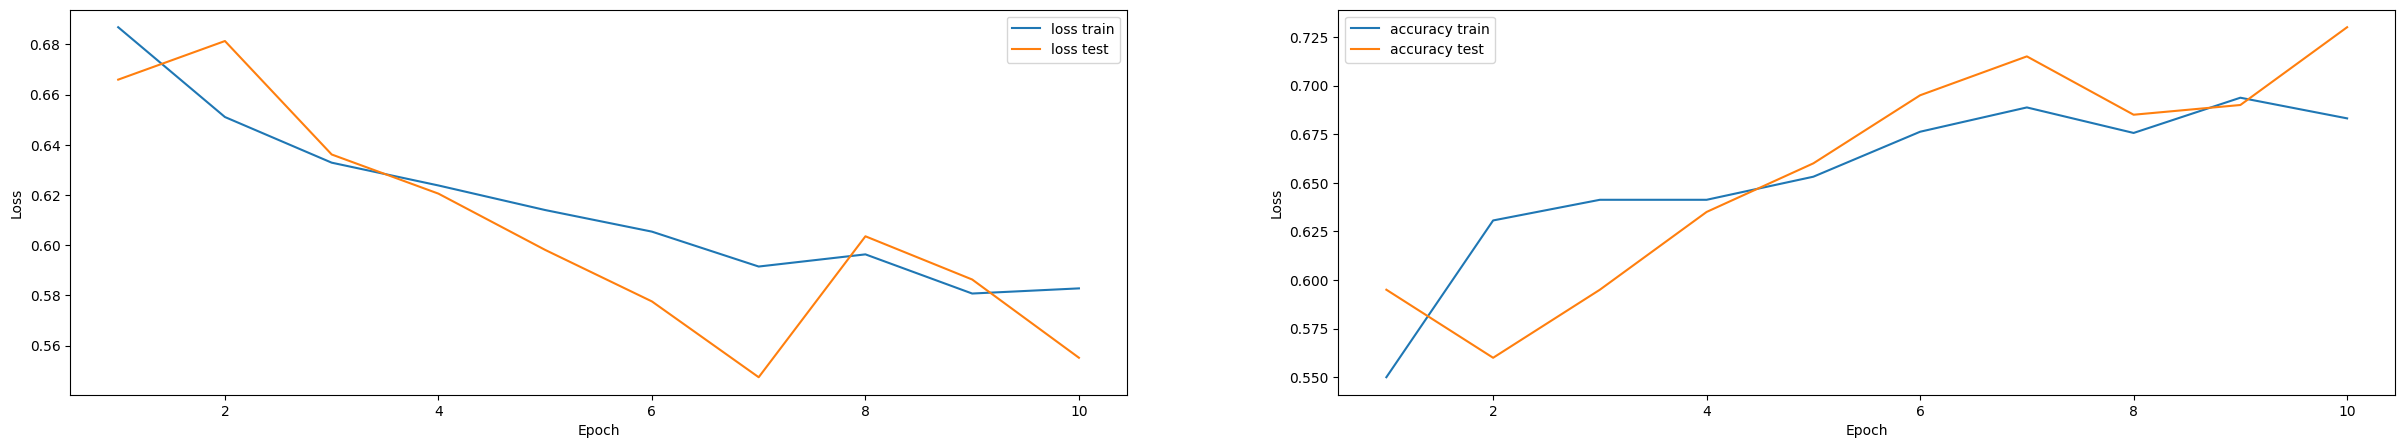



Learning rate: 0.01, Batch size: 25
Epoch : 1, train accuracy : 0.6181248426437378, train loss : 0.6765378713607788
Epoch : 1, val_accuracy : 0.5799999833106995, val_loss : 0.6749301552772522
Epoch : 2, train accuracy : 0.6249998211860657, train loss : 0.651227593421936
Epoch : 2, val_accuracy : 0.6449999809265137, val_loss : 0.660966694355011
Epoch : 3, train accuracy : 0.6281248927116394, train loss : 0.6535292267799377
Epoch : 3, val_accuracy : 0.6800000071525574, val_loss : 0.6193096041679382
Epoch : 4, train accuracy : 0.6356250047683716, train loss : 0.64276123046875
Epoch : 4, val_accuracy : 0.6549999713897705, val_loss : 0.6205542683601379
Epoch : 5, train accuracy : 0.638124942779541, train loss : 0.636451244354248
Epoch : 5, val_accuracy : 0.6399999856948853, val_loss : 0.62436842918396
Epoch : 6, train accuracy : 0.6643749475479126, train loss : 0.6209050416946411
Epoch : 6, val_accuracy : 0.6799999475479126, val_loss : 0.5913434028625488
Epoch : 7, train accuracy : 0.6899

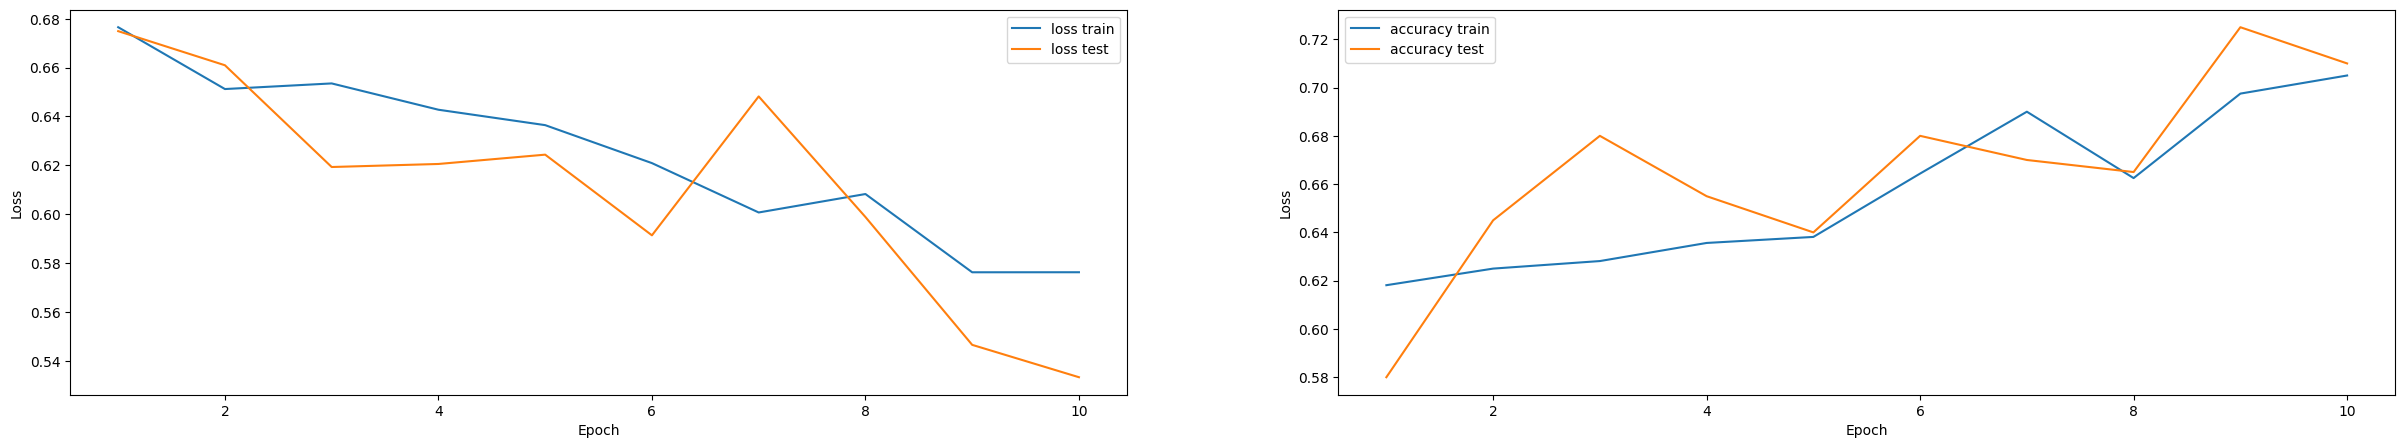



Learning rate: 0.001, Batch size: 25
Epoch : 1, train accuracy : 0.5824999809265137, train loss : 0.6759350895881653
Epoch : 1, val_accuracy : 0.6349999904632568, val_loss : 0.6613211631774902
Epoch : 2, train accuracy : 0.6387498378753662, train loss : 0.6448938250541687
Epoch : 2, val_accuracy : 0.5799999833106995, val_loss : 0.6453940868377686
Epoch : 3, train accuracy : 0.6506249904632568, train loss : 0.6241948008537292
Epoch : 3, val_accuracy : 0.6150000095367432, val_loss : 0.6220943331718445
Epoch : 4, train accuracy : 0.6656250953674316, train loss : 0.6105966567993164
Epoch : 4, val_accuracy : 0.6799999475479126, val_loss : 0.5805841088294983
Epoch : 5, train accuracy : 0.669999897480011, train loss : 0.6024575233459473
Epoch : 5, val_accuracy : 0.6999999284744263, val_loss : 0.5882685780525208
Epoch : 6, train accuracy : 0.695624828338623, train loss : 0.5787436366081238
Epoch : 6, val_accuracy : 0.7249999642372131, val_loss : 0.5693577527999878
Epoch : 7, train accuracy :

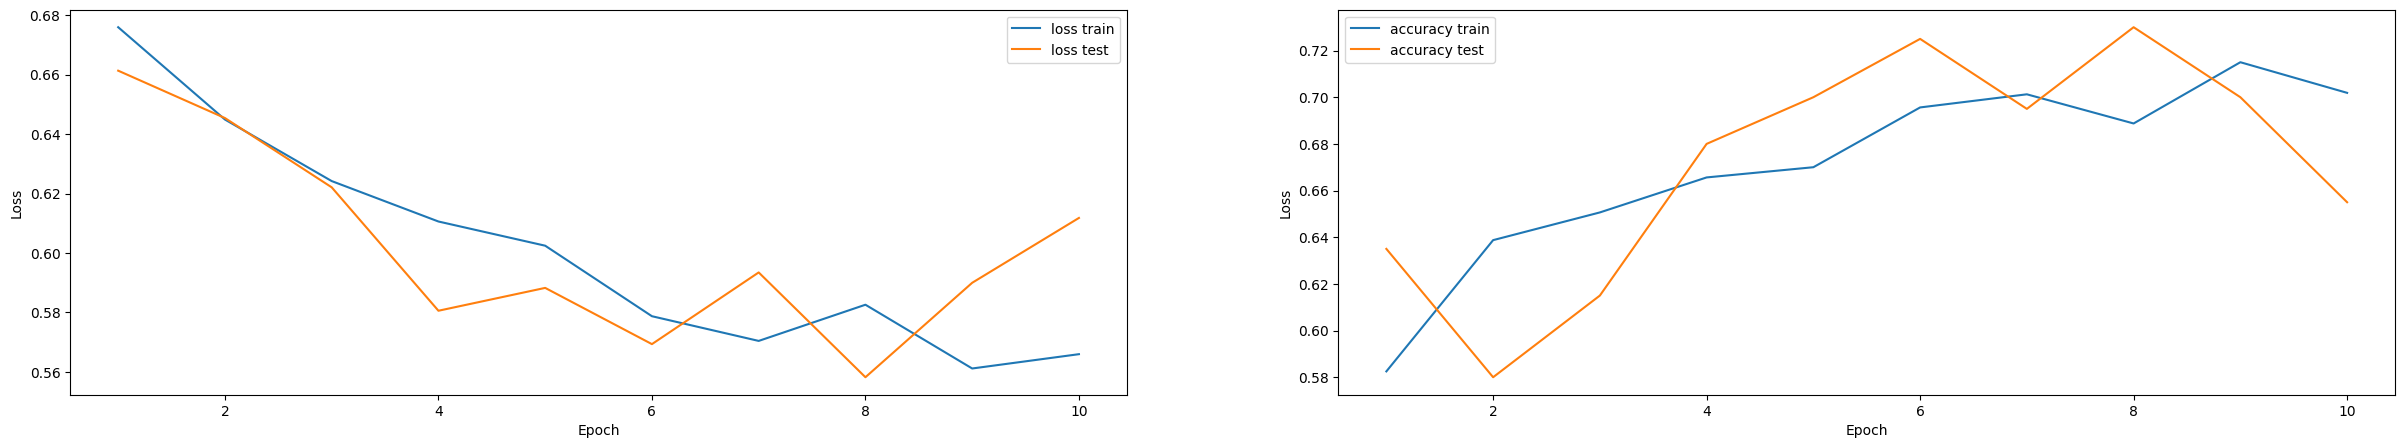



Learning rate: 0.0001, Batch size: 25
Epoch : 1, train accuracy : 0.5587499141693115, train loss : 0.6789491772651672
Epoch : 1, val_accuracy : 0.5699999928474426, val_loss : 0.68819260597229
Epoch : 2, train accuracy : 0.604374885559082, train loss : 0.6574419140815735
Epoch : 2, val_accuracy : 0.6349999904632568, val_loss : 0.6477517485618591
Epoch : 3, train accuracy : 0.6406249403953552, train loss : 0.6375492811203003
Epoch : 3, val_accuracy : 0.6499999761581421, val_loss : 0.6450932025909424
Epoch : 4, train accuracy : 0.6374998092651367, train loss : 0.6277521252632141
Epoch : 4, val_accuracy : 0.6449999809265137, val_loss : 0.6332166790962219
Epoch : 5, train accuracy : 0.664999783039093, train loss : 0.6178398132324219
Epoch : 5, val_accuracy : 0.6799999475479126, val_loss : 0.6136257648468018
Epoch : 6, train accuracy : 0.6887498497962952, train loss : 0.5991132855415344
Epoch : 6, val_accuracy : 0.6949999332427979, val_loss : 0.6016095280647278
Epoch : 7, train accuracy : 

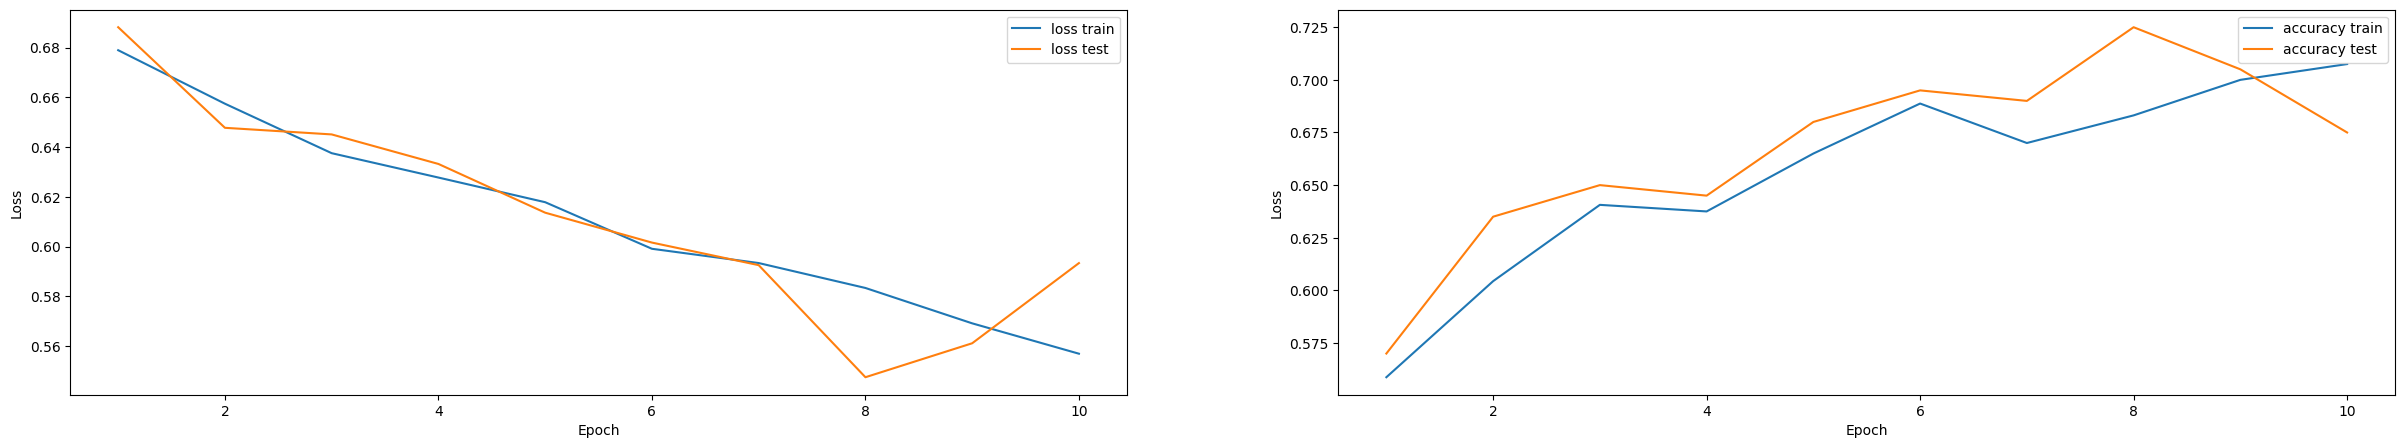



Learning rate: 0.01, Batch size: 50
Epoch : 1, train accuracy : 0.5018750429153442, train loss : 0.7297662496566772
Epoch : 1, val_accuracy : 0.5049999356269836, val_loss : 0.6949282288551331
Epoch : 2, train accuracy : 0.5006250143051147, train loss : 0.6940030455589294
Epoch : 2, val_accuracy : 0.5049999952316284, val_loss : 0.6930978894233704
Epoch : 3, train accuracy : 0.4893749952316284, train loss : 0.6938301920890808
Epoch : 3, val_accuracy : 0.4950000047683716, val_loss : 0.6933216452598572
Epoch : 4, train accuracy : 0.4831249713897705, train loss : 0.6938062906265259
Epoch : 4, val_accuracy : 0.5049999952316284, val_loss : 0.6931235790252686
Epoch : 5, train accuracy : 0.5006250143051147, train loss : 0.6932916641235352
Epoch : 5, val_accuracy : 0.5049999952316284, val_loss : 0.6931071281433105
Epoch : 6, train accuracy : 0.5018749237060547, train loss : 0.6933876872062683
Epoch : 6, val_accuracy : 0.4949999451637268, val_loss : 0.6931543350219727
Epoch : 7, train accuracy 

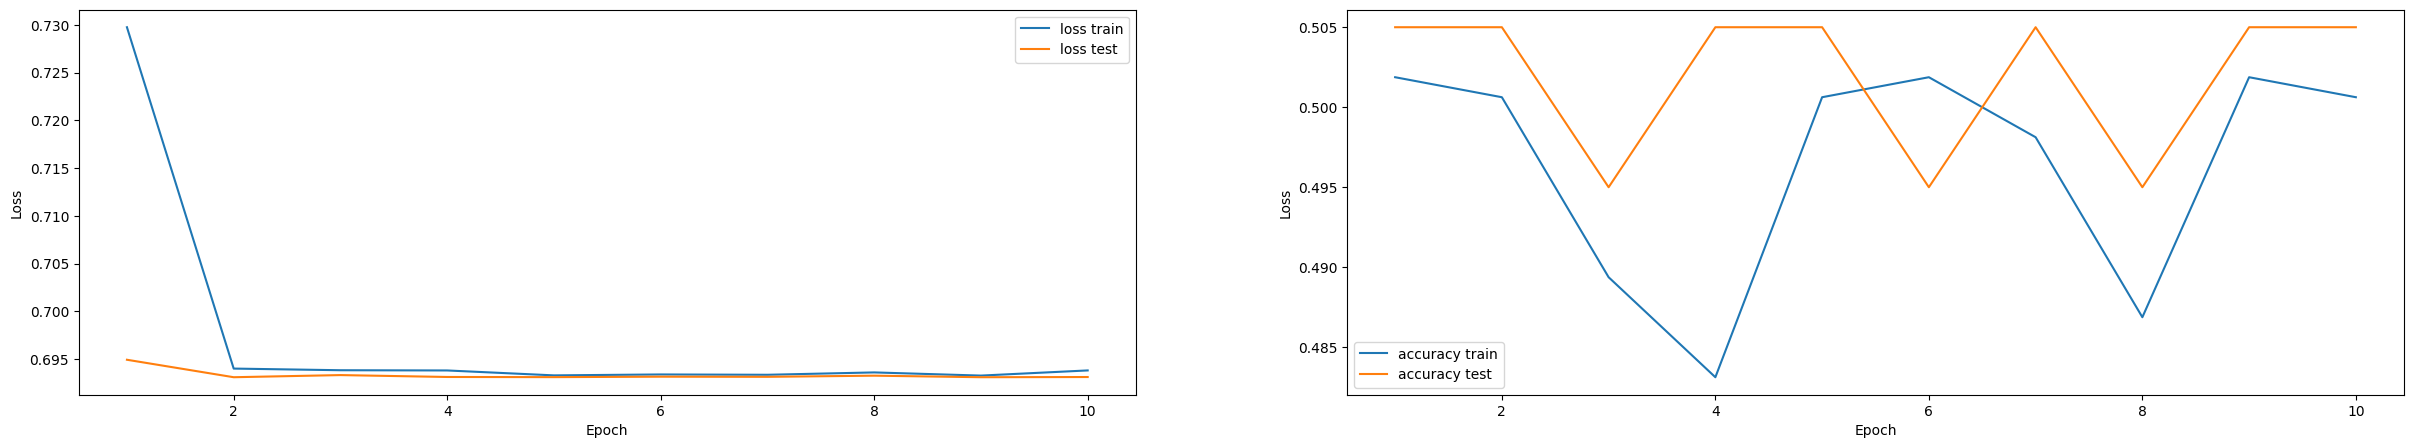



Learning rate: 0.001, Batch size: 50
Epoch : 1, train accuracy : 0.5875000357627869, train loss : 0.6677289605140686
Epoch : 1, val_accuracy : 0.6100000143051147, val_loss : 0.642135500907898
Epoch : 2, train accuracy : 0.6706249713897705, train loss : 0.6229444146156311
Epoch : 2, val_accuracy : 0.6649999618530273, val_loss : 0.5807259678840637
Epoch : 3, train accuracy : 0.7037500739097595, train loss : 0.583339512348175
Epoch : 3, val_accuracy : 0.6599999666213989, val_loss : 0.5880655646324158
Epoch : 4, train accuracy : 0.7087498903274536, train loss : 0.5668843388557434
Epoch : 4, val_accuracy : 0.7150000333786011, val_loss : 0.556628942489624
Epoch : 5, train accuracy : 0.7131249308586121, train loss : 0.5647743940353394
Epoch : 5, val_accuracy : 0.7399999499320984, val_loss : 0.5317456126213074
Epoch : 6, train accuracy : 0.7112500071525574, train loss : 0.5526395440101624
Epoch : 6, val_accuracy : 0.7549999952316284, val_loss : 0.5259640216827393
Epoch : 7, train accuracy : 

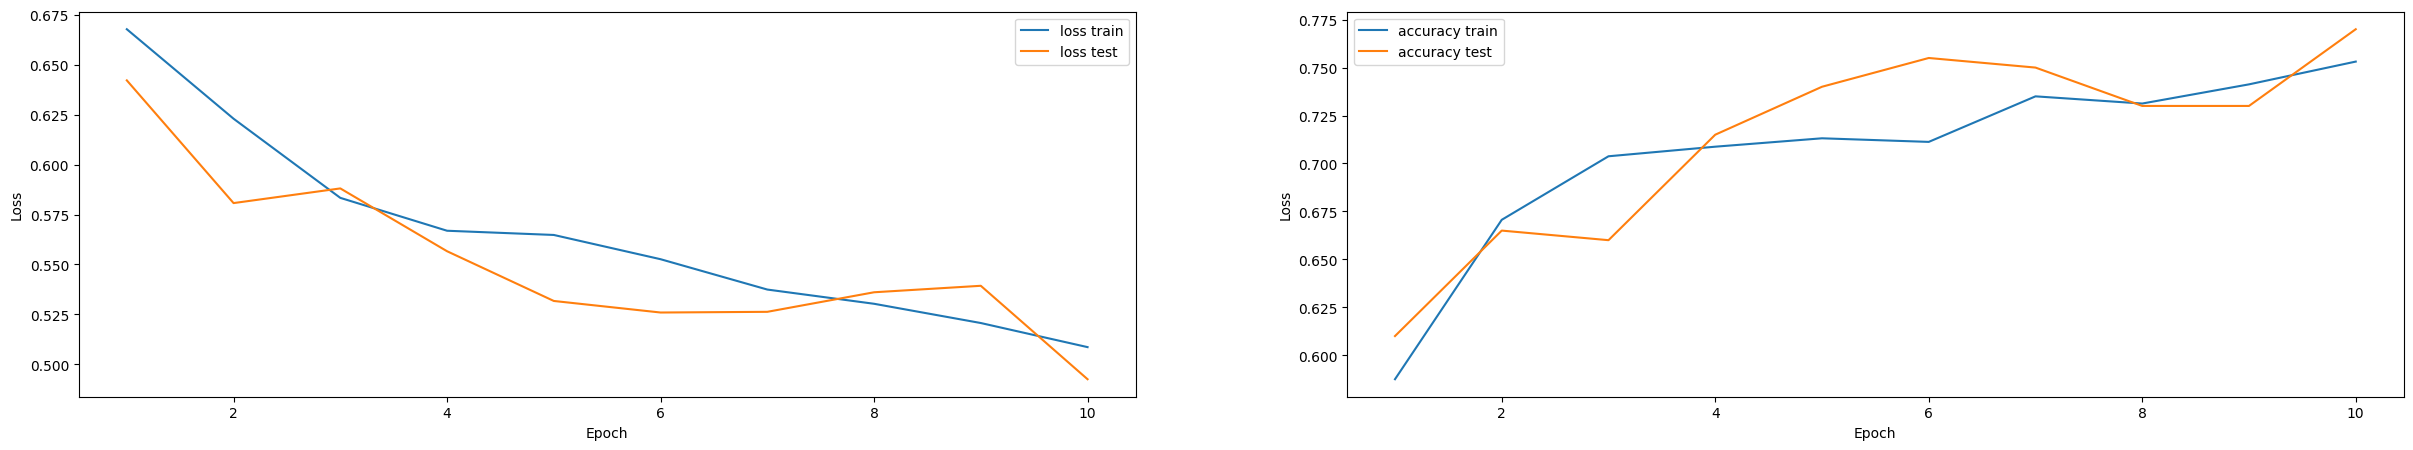



Learning rate: 0.0001, Batch size: 50
Epoch : 1, train accuracy : 0.5349999666213989, train loss : 0.6936683654785156
Epoch : 1, val_accuracy : 0.5600000023841858, val_loss : 0.6857258677482605
Epoch : 2, train accuracy : 0.574999988079071, train loss : 0.6802467107772827
Epoch : 2, val_accuracy : 0.5699999928474426, val_loss : 0.6767983436584473
Epoch : 3, train accuracy : 0.6043751239776611, train loss : 0.6641212701797485
Epoch : 3, val_accuracy : 0.6100000143051147, val_loss : 0.6627416014671326
Epoch : 4, train accuracy : 0.638124942779541, train loss : 0.6558699607849121
Epoch : 4, val_accuracy : 0.6100000143051147, val_loss : 0.6612833142280579
Epoch : 5, train accuracy : 0.6299999356269836, train loss : 0.6428406238555908
Epoch : 5, val_accuracy : 0.6399999856948853, val_loss : 0.6528010964393616
Epoch : 6, train accuracy : 0.6499999761581421, train loss : 0.6337341070175171
Epoch : 6, val_accuracy : 0.6199999451637268, val_loss : 0.6525653004646301
Epoch : 7, train accuracy 

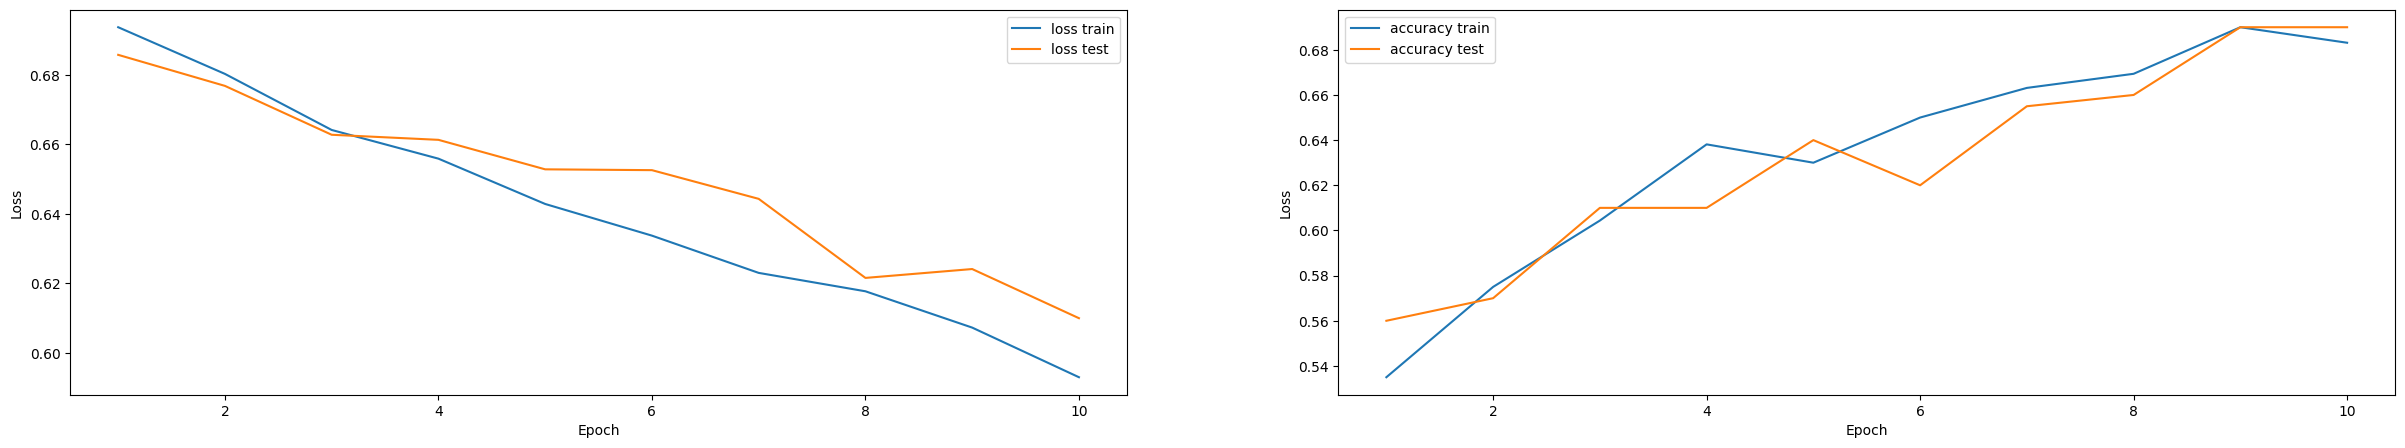

In [16]:
epochs = 10

def train_loop (model, train_loader, val_loader, epochs, optimizer, criterion, saving_path):
    val_loss_list = []
    val_accuracy_list = []

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0

        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)

            output = model(data)
            loss = criterion(output, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)

        loss_list.append(epoch_loss.item())
        accuracy_list.append(epoch_accuracy.item())

        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


        with torch.no_grad():
            epoch_val_accuracy=0
            epoch_val_loss =0

            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)

                val_output = model(data)
                val_loss = criterion(val_output,label)

                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)


            val_loss_list.append(epoch_val_loss.item())
            val_accuracy_list.append(epoch_val_accuracy.item())

            print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))


    num_epochs = [i+1 for i in range(epochs)]

    fig = plt.figure(figsize=(30, 5))
    fig.add_subplot(1,2,1)
    plt.plot(num_epochs, loss_list, label = 'loss train')
    plt.plot(num_epochs, val_loss_list, label = 'loss test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    fig.add_subplot(1,2,2)
    plt.plot(num_epochs, accuracy_list, label = 'accuracy train')
    plt.plot(num_epochs, val_accuracy_list, label = 'accuracy test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss_list': loss_list,
            'accuracy_list': accuracy_list,
            'val_loss_list': val_loss_list,
            'val_accuracy_list': val_accuracy_list,
        }, saving_path)


for batch_size in [10, 25, 50]:

    train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True)

    val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=True)

    for lr in [0.01, 0.001, 0.0001]:
        print(f'Learning rate: {lr}, Batch size: {batch_size}')

        model = ConvNet().to(device)
        model.train()

        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()


        train_loop(model, train_loader, val_loader, epochs, optimizer, criterion, f"model_{batch_size}_{lr}.pth")
        print()
        print()

Tasks 7-8.
The work of the model

In [18]:
for batch_size in [10, 25, 50]:
    test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=1, shuffle=False)
    for lr in [0.01, 0.001, 0.0001]:
        print(f"Batch size: {batch_size}, lr: {lr}")

        model = ConvNet().to(device)
        checkpoint = torch.load(f"model_{batch_size}_{lr}.pth", map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        correct = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                preds = model(images)
                preds_list = F.softmax(preds, dim=1)[:, 1].tolist()[0]
                if preds_list > 0.5:
                    label = 1
                else:
                    label = 0
                if labels.item() == label:
                    correct += 1
        print(f"Correct detection: {(correct / len(test_loader)) * 100}%\n")


Batch size: 10, lr: 0.01
Correct detection: 49.0%

Batch size: 10, lr: 0.001
Correct detection: 69.5%

Batch size: 10, lr: 0.0001
Correct detection: 69.0%

Batch size: 25, lr: 0.01
Correct detection: 69.5%

Batch size: 25, lr: 0.001
Correct detection: 72.0%

Batch size: 25, lr: 0.0001
Correct detection: 67.0%

Batch size: 50, lr: 0.01
Correct detection: 49.0%

Batch size: 50, lr: 0.001
Correct detection: 55.50000000000001%

Batch size: 50, lr: 0.0001
Correct detection: 67.5%



cat


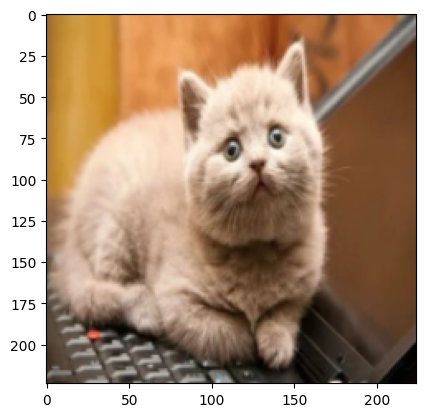

cat


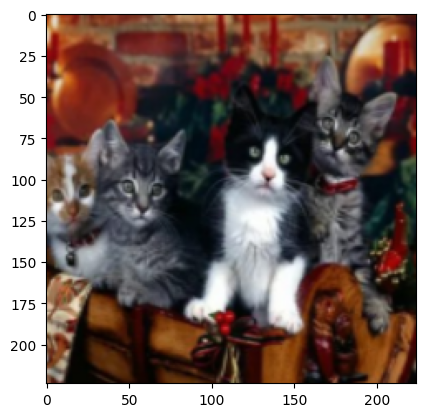

dog


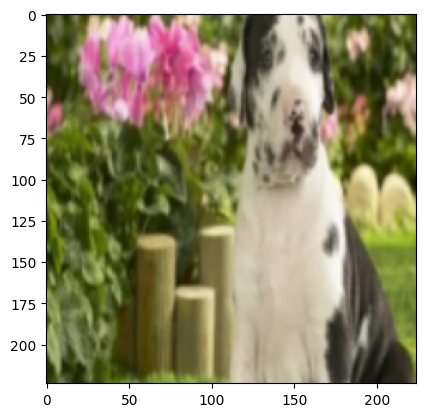

cat


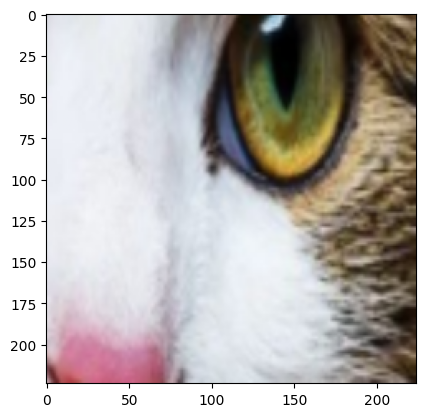

cat


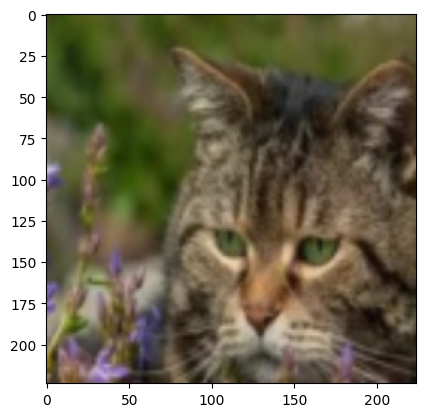

cat


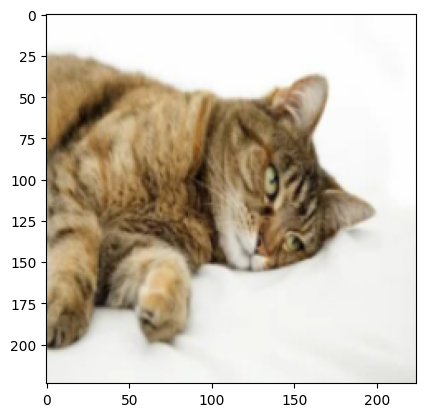

In [20]:
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=1, shuffle=True)
model = ConvNet().to(device)
checkpoint = torch.load(f"model_{25}_{0.001}.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

with torch.no_grad():
    i = 0
    for images, labels in test_loader:
        images = images.to(device)
        preds = model(images)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()[0]
        if preds_list > 0.5:
            label = "dog"
        else:
            label = "cat"
        print(label)
        img = images[0].cpu().detach().numpy()
        img = np.swapaxes(img, 0, 2)
        img = np.swapaxes(img, 0, 1)
        plt.imshow(img)
        plt.show()
        i+=1
        if i > 5:
            break

Вывод: лучший результат (72%) у модели с параметрами batch size: 25, lr: 0.001. Почти для всех моделей можно увидеть взаимосвязь между уменьшением lr и повышением точности классификации.